In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('D:\\self study\\Naresh IT\\Data Science\\12.Classification\\gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [4]:
df.columns

Index(['Gene One', 'Gene Two', 'Cancer Present'], dtype='object')

In [5]:
df.dtypes

Gene One          float64
Gene Two          float64
Cancer Present      int64
dtype: object

In [6]:
df.shape

(3000, 3)

# Exploratory Data Analysis

In [7]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


<AxesSubplot:xlabel='Gene One'>

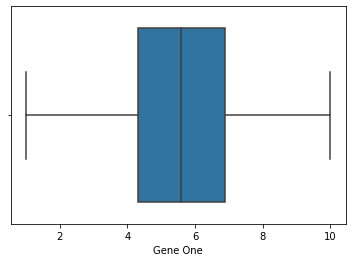

In [8]:
sns.boxplot(df['Gene One'])

<AxesSubplot:xlabel='Gene Two'>

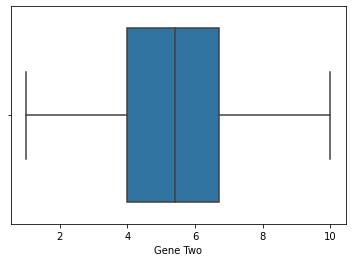

In [9]:
sns.boxplot(df['Gene Two'])

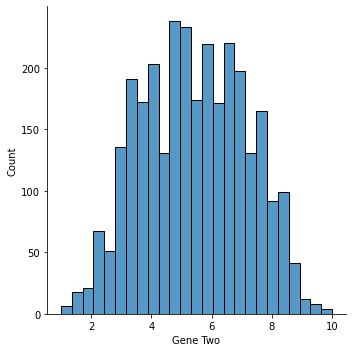

In [10]:
sns.displot(df['Gene Two'])

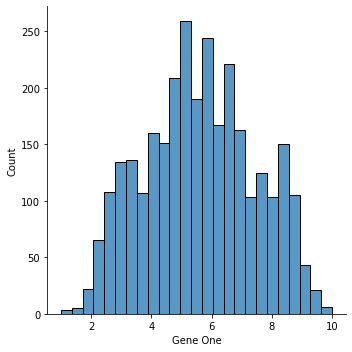

In [11]:
sns.displot(df['Gene One'])

<AxesSubplot:xlabel='Cancer Present', ylabel='Gene One'>

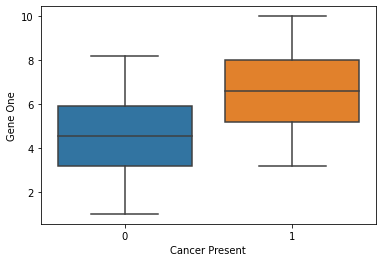

In [12]:
sns.boxplot(x='Cancer Present',y='Gene One',data=df)

<AxesSubplot:xlabel='Cancer Present', ylabel='Gene Two'>

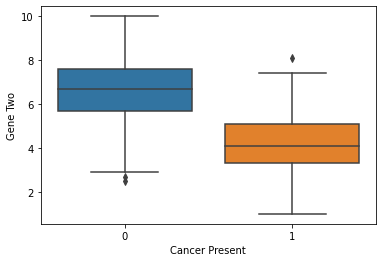

In [13]:
sns.boxplot(x='Cancer Present',y='Gene Two',data=df)

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

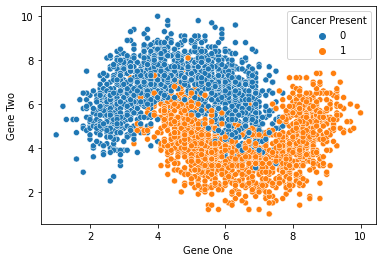

In [14]:
sns.scatterplot(x='Gene One',y='Gene Two', hue= 'Cancer Present',data=df)

In [15]:
df.corr()

,Gene One,Gene Two,Cancer Present
Gene One,1.000000,-0.375427,0.545854
Gene Two,-0.375427,1.000000,-0.692352
Cancer Present,0.545854,-0.692352,1.000000


In [16]:
df['Gene One'].skew()

0.0270424877389434

In [17]:
df['Gene Two'].skew()

0.0028707848389388888

<AxesSubplot:>

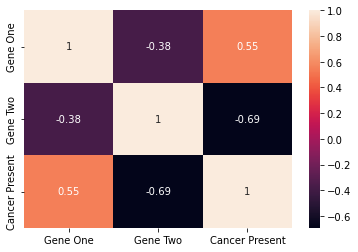

In [18]:
sns.heatmap(df.corr(),annot=True)

In [19]:
df.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

In [20]:
X= df.drop('Cancer Present',axis=1)
y=df['Cancer Present']

# train_test split

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# modeling with default parameter

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# model
knn_model=KNeighborsClassifier()

knn_model.fit(X_train,y_train)

# prediction

train_prediction= knn_model.predict(X_train)
test_prediction= knn_model.predict(X_test)

# evaluation

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_prediction))
print(accuracy_score(y_train,train_prediction))

# cross validation score

from sklearn.model_selection import cross_val_score
score= cross_val_score(knn_model,X,y,cv=5)
print(score)
score.mean()

0.9277777777777778
0.9428571428571428
[0.91333333 0.93       0.92833333 0.93       0.93166667]


0.9266666666666665

In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_prediction))
print(accuracy_score(y_train,train_prediction))

0.9277777777777778
0.9428571428571428


In [27]:
test_acc = []
for k in range(1,31):
    knn_model=KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train,y_train)
    train_prediction= knn_model.predict(X_train)
    test_prediction= knn_model.predict(X_test)
    test_accuracy=accuracy_score(y_test,test_prediction)
    test_acc.append(test_accuracy)

test_acc

[0.9011111111111111,
 0.9022222222222223,
 0.9266666666666666,
 0.9244444444444444,
 0.9277777777777778,
 0.9355555555555556,
 0.9355555555555556,
 0.9388888888888889,
 0.9422222222222222,
 0.9377777777777778,
 0.9388888888888889,
 0.94,
 0.9388888888888889,
 0.9377777777777778,
 0.9411111111111111,
 0.9422222222222222,
 0.9433333333333334,
 0.9444444444444444,
 0.9477777777777778,
 0.9466666666666667,
 0.9455555555555556,
 0.9488888888888889,
 0.9455555555555556,
 0.9455555555555556,
 0.9433333333333334,
 0.9444444444444444,
 0.9444444444444444,
 0.9422222222222222,
 0.9433333333333334,
 0.9477777777777778]

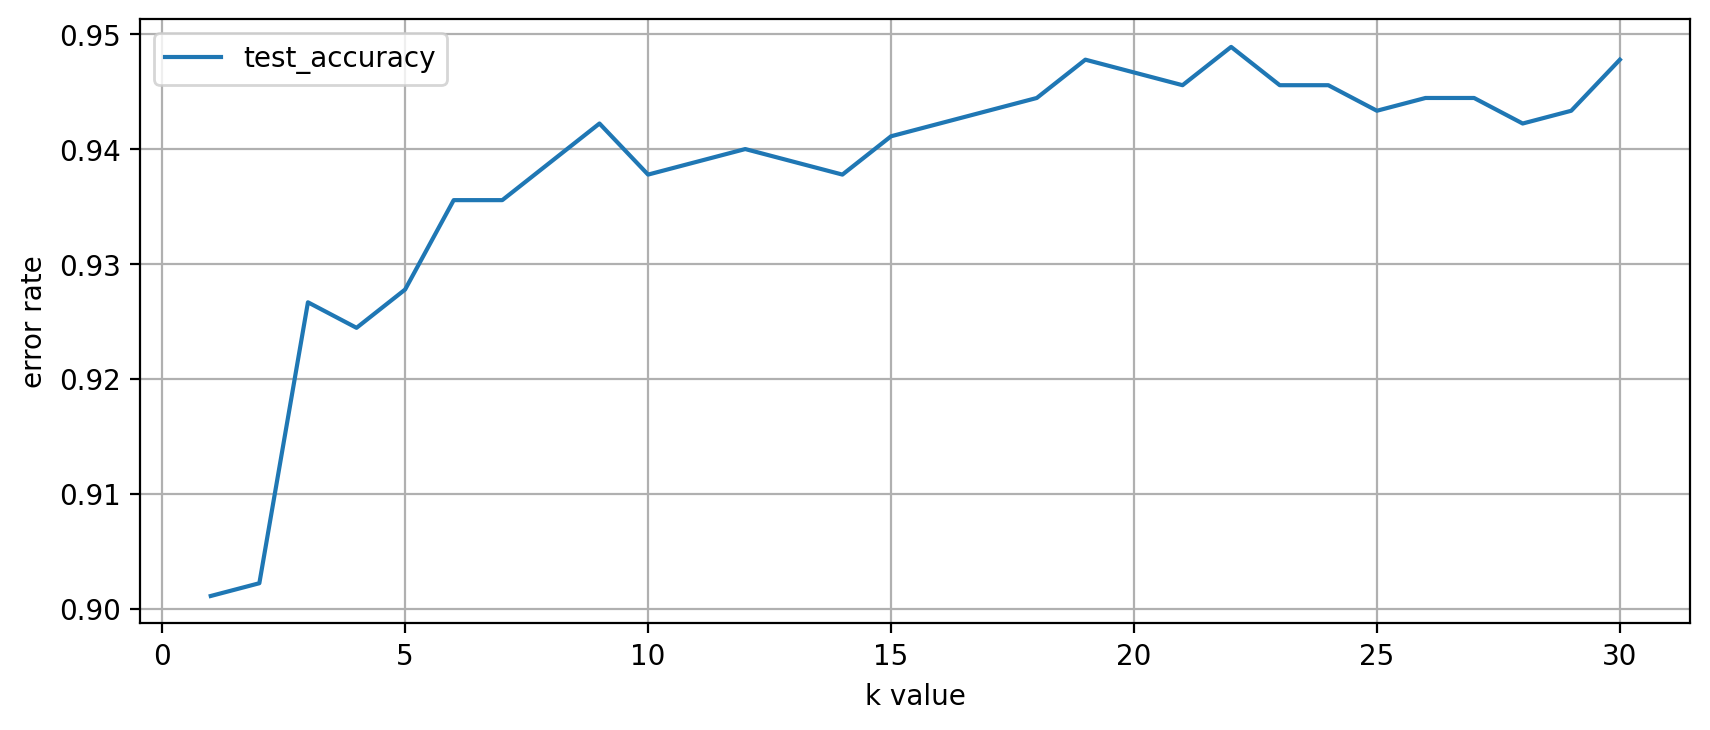

In [28]:
plt.figure(figsize=(10,4),dpi=200)
plt.plot(range(1,31),test_acc,label='test_accuracy')
plt.grid()
plt.ylabel('error rate')
plt.xlabel('k value')
plt.legend()

# modeling- hyperparameter tuning for KNN classifier

In [29]:
from sklearn.model_selection import GridSearchCV

estimator=KNeighborsClassifier()
param_grid= {'n_neighbors' : list(range(1,31)),'p':[1,2]}

Hp_knn= GridSearchCV(estimator,param_grid,cv=5, scoring='accuracy')

Hp_knn.fit(X_train,y_train)

Hp_knn.best_params_

{'n_neighbors': 20, 'p': 2}

# rebuilt KNN model with best hyperparameter tunning

In [30]:
knn_model = KNeighborsClassifier(n_neighbors=20,p=2)

knn_model.fit(X_train,y_train)

# prediction

train_prediction= knn_model.predict(X_train)
test_prediction= knn_model.predict(X_test)

# evaluation

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_prediction))
print(accuracy_score(y_train,train_prediction))


score= cross_val_score(knn_model,X,y,cv=5)
print(score)
score.mean()


0.9466666666666667
0.9338095238095238
[0.92666667 0.94666667 0.93166667 0.92833333 0.935     ]


0.9336666666666666

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,test_prediction)

array([[451,  19],
       [ 29, 401]], dtype=int64)

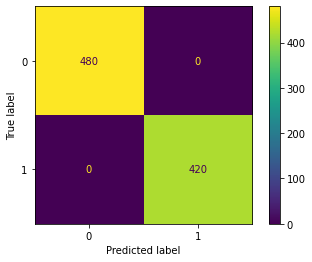

In [32]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model,X_test,test_prediction)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900

